In [ ]:
import glob as glob
import subprocess

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sp
from sklearn import metrics
from sklearn.metrics import (auc, precision_recall_curve, roc_auc_score)

# -----------------------------------------
# Write optimization scripts
# -----------------------------------------

Prior to running, need to generate features with the 03_generate_rdkit_fts.sh

### HO script for RFCs on fingerprints

In [4]:
data_path = "../ngonorrhoeae_abx_ml_discovery/data/data_prep_for_ml/data_prep_for_ml_pk_37k_screen/"
model_path = "../ngonorrhoeae_abx_ml_discovery/models/other_models/rfc_hyperopt_pk_37k/"

In [ ]:
bash_dir = "04_hyperopt_rfc_pk_37k.sh"

prefix = "python sklearn_train.py "
suffix = (
    " --data_path "
    + data_path
    + "TRAIN_03_19_2022.csv --num_folds 3 --dataset_type classification --features_path "
    + data_path
    + "TRAIN_03_19_2022.npz  --no_features_scaling --split_type scaffold_balanced --split_sizes 0.8 0.1 0.1 --smiles_columns SMILES --target_columns hit --model_type svm --metric prc-auc --extra_metrics auc" # noqa: E501
)

numbits = [512, 1024, 2048, 4096]
radius = [2, 3, 4, 5, 6]
classweight = ["balanced"]
numtrees = [50, 100, 250, 500, 750, 1000, 2000, 3000]

file1 = open(bash_dir, "a")
file1.write("cd ../../chemprop/; mkdir " + model_path + " ")
file1.write("\n")
file1.close()

model_dir = 0
for l in numbits:
    for d in radius:
        for h in classweight:
            for n in numtrees:
                command = (
                    "mkdir "
                    + model_path
                    + str(model_dir)
                    + "; "
                    + prefix
                    + "--num_bits "
                    + str(l)
                    + " --radius "
                    + str(d)
                    + " --class_weight "
                    + str(h)
                    + " --num_trees "
                    + str(n)
                    + " --save_dir "
                    + model_path
                    + str(model_dir)
                    + suffix
                )
                model_dir = model_dir + 1
                file1 = open(bash_dir, "a")
                file1.write(command)
                file1.write("\n")
                file1.close()

### HO script for SVMs on fingerprints

In [6]:
data_path = "../ngonorrhoeae_abx_ml_discovery/data/data_prep_for_ml/data_prep_for_ml_pk_37k_screen/"
model_path = "../ngonorrhoeae_abx_ml_discovery/models/other_models/svm_hyperopt_pk_37k/"

In [ ]:
bash_dir = "04_hyperopt_svm_pk_37k.sh"

prefix = "python sklearn_train.py "
suffix = (
    " --data_path "
    + data_path
    + "TRAIN_03_19_2022.csv --num_folds 3 --dataset_type classification --features_path "
    + data_path
    + "TRAIN_03_19_2022.npz  --no_features_scaling --split_type scaffold_balanced --split_sizes 0.8 0.1 0.1 --smiles_columns SMILES --target_columns hit --model_type svm --metric prc-auc --extra_metrics auc" # noqa: E501
)

numbits = [512, 1024, 2048, 4096]
radius = [2, 3, 4, 5, 6]
classweight = ["balanced"]

file1 = open(bash_dir, "a")
file1.write("cd ../../chemprop/; mkdir " + model_path + " ")
file1.write("\n")
file1.close()

model_dir = 0
for l in numbits:
    for d in radius:
        for h in classweight:
            command = (
                "mkdir "
                + model_path
                + str(model_dir)
                + "; "
                + prefix
                + "--num_bits "
                + str(l)
                + " --radius "
                + str(d)
                + " --class_weight "
                + str(h)
                + " --save_dir "
                + model_path
                + str(model_dir)
                + suffix
            )
            model_dir = model_dir + 1
            file1 = open(bash_dir, "a")
            file1.write(command)
            file1.write("\n")
            file1.close()

### HO script for FFNs on fingerprints

In [10]:
data_path = "../ngonorrhoeae_abx_ml_discovery/data/data_prep_for_ml/data_prep_for_ml_pk_37k_screen/"
model_path = "../ngonorrhoeae_abx_ml_discovery/models/other_models/ffn_hyperopt_pk_37k/"

In [ ]:
bash_dir = "04_hyperopt_ffn_pk_37k.sh"

prefix = "python train.py "
suffix = (
    " --data_path "
    + data_path
    + "TRAIN_03_19_2022.csv --num_folds 3 --dataset_type classification --features_generator morgan --no_features_scaling --split_type scaffold_balanced --split_sizes 0.8 0.1 0.1 --smiles_columns SMILES --target_columns hit --depth 0 --features_only --metric prc-auc --extra_metrics auc" # noqa: E501
)

hidden_size = [500, 1000, 1500, 2000, 2500, 3000]
ffn_num_layers = [1, 2, 3, 4]
dropout = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4]

file1 = open(bash_dir, "a")
file1.write("cd ../../chemprop/; mkdir " + model_path + " ")
file1.write("\n")
file1.close()

model_dir = 0
for h in hidden_size:
    for f in ffn_num_layers:
        for dr in dropout:
            command = (
                prefix
                + " --hidden_size "
                + str(h)
                + " --ffn_num_layers "
                + str(f)
                + " --dropout "
                + str(dr)
                + " --save_dir "
                + model_path
                + str(model_dir)
                + suffix
            )
            model_dir = model_dir + 1
            file1 = open(bash_dir, "a")
            file1.write(command)
            file1.write("\n")
            file1.close()

### HO script for PK GNN model alone

In [2]:
data_path = "data/data_prep_for_ml/data_prep_for_ml_pk_screen/"
model_path = "models/pk_screen_models_11152021/"

In [ ]:
bash_dir = "04_hyperopt_pk_screen_11152021.sh"

prefix = "chemprop_train "
suffix = (
    " --data_path "
    + data_path
    + "TRAIN_11_15_2021.csv --dataset_type classification --features_path "
    + data_path
    + "TRAIN_11_15_2021.npz --no_features_scaling --num_folds 3 --ensemble_size 1 --split_type scaffold_balanced --split_sizes 0.8 0.1 0.1 --smiles_columns SMILES --target_columns hit --metric prc-auc --extra_metrics auc" # noqa: E501
)

initlr = [1e-3, 1e-4]
dropout = [0.1, 0.2, 0.3, 0.4]
hiddensize = [300, 500, 700, 1000, 1200, 1500]
ffnnumlayers = [1, 2, 3]
depth = [3, 4, 5]

model_dir = 0
for l in initlr:
    for d in dropout:
        for h in hiddensize:
            for f in ffnnumlayers:
                for de in depth:
                    command = (
                        "mkdir "
                        + model_path
                        + str(model_dir)
                        + "; "
                        + prefix
                        + "--init_lr "
                        + str(l)
                        + " --dropout "
                        + str(d)
                        + " --hidden_size "
                        + str(h)
                        + " --ffn_num_layers "
                        + str(f)
                        + " --depth "
                        + str(de)
                        + " --save_dir "
                        + model_path
                        + str(model_dir)
                        + suffix
                    )
                    model_dir = model_dir + 1
                    file1 = open(bash_dir, "a")
                    file1.write(command)
                    file1.write("\n")
                    file1.close()

### For all other GNNs, use bayesian optimization

# -----------------------------------------
# Identify appropriate model parameters
# -----------------------------------------

### RFCs on fingerprints

In [2]:
model_path = "../models/other_models/rfc_hyperopt_pk_37k/"
cols = ["number", "numbits", "radius", "classweight", "numtrees"]
df = pd.DataFrame(columns=cols)

numbits = [512, 1024, 2048, 4096]
radius = [2, 3, 4, 5, 6]
classweight = ["balanced"]
numtrees = [50, 100, 250, 500, 750, 1000, 2000, 3000]

# map parameters back to numbers
model_dir = 0
for l in numbits:
    for d in radius:
        for h in classweight:
            for f in numtrees:
                new_row = [model_dir, l, d, h, f]
                new = pd.DataFrame(new_row).T
                # new = new.transpose()
                new.columns = cols
                df = pd.concat([df, new], ignore_index=True)
                model_dir = model_dir + 1
df

,number,numbits,radius,classweight,numtrees
0,0,512,2,balanced,50
1,1,512,2,balanced,100
2,2,512,2,balanced,250
3,3,512,2,balanced,500
4,4,512,2,balanced,750
...,...,...,...,...,...
155,155,4096,6,balanced,500
156,156,4096,6,balanced,750
157,157,4096,6,balanced,1000
158,158,4096,6,balanced,2000


In [3]:
def add_results_to_df(df, model_path):
    df["mean auroc"] = [0] * len(df)
    df["mean aupr"] = [0] * len(df)

    best_yet_auroc = 0
    best_yet_auroc_index = ""

    best_yet_aupr = 0
    best_yet_aupr_index = ""

    for name in glob.glob(model_path + "**/test_scores.csv", recursive=True):
        try:
            clean_num = int(name.split(model_path)[1].split("/")[0])
        except Exception as e:
            print(e)
            print(name)
            continue
        new = pd.read_csv(name)
        mean_auroc = float(list(new["Mean auc"])[0])
        mean_aupr = float(list(new["Mean prc-auc"])[0])
        df.iloc[clean_num, df.columns.get_loc("mean auroc")] = mean_auroc
        df.iloc[clean_num, df.columns.get_loc("mean aupr")] = mean_aupr

        if mean_auroc > best_yet_auroc:
            best_yet_auroc = mean_auroc
            best_yet_auroc_index = name
        if mean_aupr > best_yet_aupr:
            best_yet_aupr = mean_aupr
            best_yet_aupr_index = name

    print("best auroc")
    print(best_yet_auroc)
    print(best_yet_auroc_index)

    print("best aupr")
    print(best_yet_aupr)
    print(best_yet_aupr_index)

    return df


df = add_results_to_df(df, model_path)

best auroc
0.909986352392086
../models/rfc_hyperopt/155/test_scores.csv
best aupr
0.433078292286762
../models/rfc_hyperopt/122/test_scores.csv


### SVMs on fingerprints

In [5]:
model_path = "../models/other_models/svm_hyperopt_pk_37k/"
cols = ["number", "numbits", "radius", "classweight"]
df = pd.DataFrame(columns=cols)

numbits = [512, 1024, 2048, 4096]
radius = [2, 3, 4, 5, 6]
classweight = ["balanced"]

model_dir = 0
for l in numbits:
    for d in radius:
        for h in classweight:
            new_row = [model_dir, l, d, h]
            new = pd.DataFrame(new_row).T
            # new = new.transpose()
            new.columns = cols
            df = pd.concat([df, new], ignore_index=True)
            model_dir = model_dir + 1
df

,number,numbits,radius,classweight
0,0,512,2,balanced
1,1,512,3,balanced
2,2,512,4,balanced
3,3,512,5,balanced
4,4,512,6,balanced
5,5,1024,2,balanced
6,6,1024,3,balanced
7,7,1024,4,balanced
8,8,1024,5,balanced
9,9,1024,6,balanced


In [6]:
df = add_results_to_df(df, model_path)

best auroc
0.8596404990137635
../models/svm_hyperopt/19/test_scores.csv
best aupr
0.4806139209119918
../models/svm_hyperopt/15/test_scores.csv


### FFNs on fingerprints

In [8]:
model_path = "../models/other_models/ffn_hyperopt_pk_37k/"
cols = ["number", "hidden_size", "ffn_num_layers", "dropout"]
df = pd.DataFrame(columns=cols)

hidden_size = [500, 1000, 1500, 2000, 2500, 3000]
ffn_num_layers = [1, 2, 3, 4]
dropout = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4]

model_dir = 0
for l in hidden_size:
    for d in ffn_num_layers:
        for h in dropout:
            new_row = [model_dir, l, d, h]
            new = pd.DataFrame(new_row).T
            # new = new.transpose()
            new.columns = cols
            df = pd.concat([df, new], ignore_index=True)
            model_dir = model_dir + 1
df

,number,hidden_size,ffn_num_layers,dropout
0,0.0,500.0,1.0,0.10
1,1.0,500.0,1.0,0.15
2,2.0,500.0,1.0,0.20
3,3.0,500.0,1.0,0.25
4,4.0,500.0,1.0,0.30
...,...,...,...,...
163,163.0,3000.0,4.0,0.20
164,164.0,3000.0,4.0,0.25
165,165.0,3000.0,4.0,0.30
166,166.0,3000.0,4.0,0.35


In [9]:
df = add_results_to_df(df, model_path)

best auroc
0.890351108624749
../models/ffn_hyperopt_orig/13/test_scores.csv
best aupr
0.4457030144986393
../models/ffn_hyperopt_orig/20/test_scores.csv


### GNN on PK screen alone

In [10]:
cols = ["num", "init_lr", "dropout", "hiddensize", "ffn num layers", "depth"]
df = pd.DataFrame(columns=cols)

initlr = [1e-3, 1e-4]
dropout = [0.1, 0.2, 0.3, 0.4]
hiddensize = [300, 500, 700, 1000, 1200, 1500]
ffnnumlayers = [1, 2, 3]
depth = [3, 4, 5]

model_dir = 0
for l in initlr:
    for d in dropout:
        for h in hiddensize:
            for f in ffnnumlayers:
                for de in depth:
                    new_row = [model_dir, l, d, h, f, de]
                    new = pd.DataFrame(new_row).T
                    # new = new.transpose()
                    new.columns = cols
                    df = pd.concat([df, new], ignore_index=True)
                    model_dir = model_dir + 1
df

,num,init_lr,dropout,hiddensize,ffn num layers,depth
0,0.0,0.0010,0.1,300.0,1.0,3.0
1,1.0,0.0010,0.1,300.0,1.0,4.0
2,2.0,0.0010,0.1,300.0,1.0,5.0
3,3.0,0.0010,0.1,300.0,2.0,3.0
4,4.0,0.0010,0.1,300.0,2.0,4.0
...,...,...,...,...,...,...
427,427.0,0.0001,0.4,1500.0,2.0,4.0
428,428.0,0.0001,0.4,1500.0,2.0,5.0
429,429.0,0.0001,0.4,1500.0,3.0,3.0
430,430.0,0.0001,0.4,1500.0,3.0,4.0


In [11]:
df = add_results_to_df(df, model_path)  # print just auPR here

0.6024041588487318
models/151/test_scores.csv


In [12]:
# print best
df.to_csv(model_path + "pk_gnn_hyperopt_results.csv", index=False)
df.iloc[151, :]

num                151.000000
init_lr              0.001000
dropout              0.300000
hiddensize        1200.000000
ffn num layers       3.000000
depth                4.000000
mean auc             0.801554
mean prc-auc         0.602404
Name: 151, dtype: float64

### GNN on PK+37K screen

In [15]:
folder = "../models/pk_37k_screen_models_03192022/"
newdf = pd.DataFrame(columns=["Name", "auPR", "auROC"])
for name in glob.glob(folder + "**/test_scores.csv", recursive=True):
    new = pd.read_csv(name)
    cleannum = name.split(folder)[1].split("/test_scores")[0]
    mean1 = float(new.iloc[0, 1])
    mean2 = float(new.iloc[0, 8])
    currdf = pd.DataFrame()
    currdf["Name"] = [cleannum]
    currdf["auPR"] = [mean1]
    currdf["auROC"] = [mean2]
    newdf = newdf.append(currdf)
newdf = newdf.sort_values("auPR", ascending=False)
newdf.to_csv(folder + "best_bayesian_models_04052022.csv", index=False)
# depth_3_dropout_0.15000000000000002_ffn_num_layers_3_hidden_size_2300 is the best

newdf

,Name,auPR,auROC
0,depth_3_dropout_0.15000000000000002_ffn_num_la...,0.496595,0.904771
0,depth_5_dropout_0.25_ffn_num_layers_2_hidden_s...,0.493244,0.907362
0,depth_4_dropout_0.2_ffn_num_layers_3_hidden_si...,0.485611,0.904800
0,depth_6_dropout_0.30000000000000004_ffn_num_la...,0.483157,0.902562
0,depth_4_dropout_0.35000000000000003_ffn_num_la...,0.479004,0.900638
0,depth_4_dropout_0.30000000000000004_ffn_num_la...,0.474521,0.895864
0,depth_2_dropout_0.30000000000000004_ffn_num_la...,0.469082,0.899644
0,depth_3_dropout_0.4_ffn_num_layers_2_hidden_si...,0.465979,0.903821
0,depth_3_dropout_0.15000000000000002_ffn_num_la...,0.445869,0.893179
0,depth_3_dropout_0.30000000000000004_ffn_num_la...,0.435117,0.895844


### GNN on PK+37K screen + 1st round validation 

In [ ]:
folder = "../models/pk_37k_first_round_val_screen_models_10262022/"

newdf = pd.DataFrame(columns=["Name", "auPR", "auROC"])
for name in glob.glob(folder + "**/test_scores.csv", recursive=True):
    new = pd.read_csv(name)
    cleannum = name.split(folder)[1].split("/test_scores")[0]
    mean1 = float(new.iloc[0, 1])
    mean2 = float(new.iloc[0, 8])
    currdf = pd.DataFrame()
    currdf["Name"] = [cleannum]
    currdf["auPR"] = [mean1]
    currdf["auROC"] = [mean2]
    newdf = newdf.append(currdf)
newdf = newdf.sort_values("auPR", ascending=False)
newdf.to_csv(folder + "best_bayesian_models_11152022.csv", index=False)
# the model is:
# {'depth': 5, 'dropout': 0.25, 'ffn_num_layers': 2, 'hidden_size': 800}
# num params: 2,306,401
# 0.49268328715089965 +/- 0.03578022731657078 prc-auc

### GNN on PK+37K screen + 3 rounds validation 

In [ ]:
folder = "../models/pk_37k_three_rounds_val_models_03312023/"
newdf = pd.DataFrame(columns=["Name", "auPR", "auROC"])
for name in glob.glob(folder + "**/test_scores.csv", recursive=True):
    new = pd.read_csv(name)
    cleannum = name.split(folder)[1].split("/test_scores")[0]
    mean1 = float(new.iloc[0, 1])
    mean2 = float(new.iloc[0, 8])
    currdf = pd.DataFrame()
    currdf["Name"] = [cleannum]
    currdf["auPR"] = [mean1]
    currdf["auROC"] = [mean2]
    newdf = newdf.append(currdf)
newdf = newdf.sort_values("auPR", ascending=False)
newdf.to_csv(folder + "best_bayesian_models_03312023.csv", index=False)
# the model is:
# Best trial, with seed 17
# {'depth': 6, 'dropout': 0.25, 'ffn_num_layers': 3, 'linked_hidden_size': 400}
# num params: 833,601
# 0.48560833452907726 +/- 0.05567827156867362 prc-auc

# -----------------------------------------
# Run best train set models on test set
# -----------------------------------------

In [15]:
# evaluate each prediction


def modeleval(y_true, y_pred, plot=True):

    new_ytrue = []
    new_ypred = []
    for x, y in zip(y_true, y_pred):
        if y != "Invalid SMILES":
            new_ytrue.append(x)
            new_ypred.append(y)
    y_true = new_ytrue
    y_pred = new_ypred

    auroc = float(roc_auc_score(y_true, y_pred))
    print("auroc: " + str(auroc))

    # Compute Precision-Recall and plot curve
    precision, recall, thresholds = precision_recall_curve(y_true, y_pred)
    pr = float(auc(recall, precision))
    print("precision recall: " + str(pr))

    if plot:
        fig, ax = plt.subplots(figsize=(2, 2), dpi=300)
        plt.clf()
        plt.plot(recall, precision, label="Precision-recall curve")
        plt.xlabel("Recall")
        plt.ylabel("Precision")
        plt.ylim([0.0, 1.05])
        plt.xlim([0.0, 1.05])
        ax.spines["right"].set_visible(False)
        ax.spines["top"].set_visible(False)
        plt.tight_layout()
        plt.show()

        fpr, tpr, thresholds = metrics.roc_curve(y_true, y_pred)
        fig, ax = plt.subplots(figsize=(2, 2), dpi=300)
        plt.clf()
        plt.plot(fpr, tpr, label="ROC curve")
        plt.xlabel("FPR")
        plt.ylabel("TPR")
        plt.ylim([0.0, 1.05])
        plt.xlim([0.0, 1.05])
        ax.spines["right"].set_visible(False)
        ax.spines["top"].set_visible(False)
        plt.tight_layout()
        plt.show()

    return (auroc, pr, y_true, y_pred)


def test_vs_true(data_path, data_file, model_path, model_results):
    true = pd.read_csv(data_path + data_file)
    true = list(true["hit"])

    test = pd.read_csv(model_path + model_results)
    test = [float(x) if x != "Invalid SMILES" else x for x in list(test["hit"])]

    # all stats
    print("all stats")
    roc, pr, y_true, y_pred = modeleval(true, test)

    # top-100 recall
    print("top 100 predicted stats")
    top100pred = pd.DataFrame()
    top100pred["true"] = y_true
    top100pred["test"] = y_pred
    top100pred = top100pred.sort_values("test", ascending=False)
    top100pred = top100pred.iloc[0:100, :]
    top100pred_bin = [x > 0.5 for x in list(top100pred["test"])]
    print("recall: ")
    print(metrics.recall_score(top100pred["true"], top100pred_bin))
    print("precision: ")
    print(metrics.precision_score(top100pred["true"], top100pred_bin))
    _, _, _, _ = modeleval(top100pred["true"], top100pred["test"], plot=False)

### RFCs on fingerprints

In [ ]:
# test just train set model on test set - could also do command line but it was convenient to keep in notebook
data_path = "../../ngonorrhoeae_abx_ml_discovery/data/data_prep_for_ml/data_prep_for_ml_pk_37k_screen/"
model_path = (
    "../../ngonorrhoeae_abx_ml_discovery/models/other_models/rfc_hyperopt_pk_37k/"
)
actual_model_path = model_path + "122/"
model_results = "122_test_set_rfc_preds.csv"
activate_command = "conda activate chemprop; "
run_command = (
    "python sklearn_predict.py --test_path "
    + data_path
    + "TEST_03_19_2022.csv --checkpoint_dir "
    + actual_model_path
    + " --preds_path "
    + model_path
    + model_results
    + " --smiles_column SMILES"
)
full_command = activate_command + run_command
test = subprocess.run(
    full_command, cwd="../../chemprop/", shell=True, capture_output=True
)

all stats
auroc: 0.9298151977585031
precision recall: 0.4375764660273601


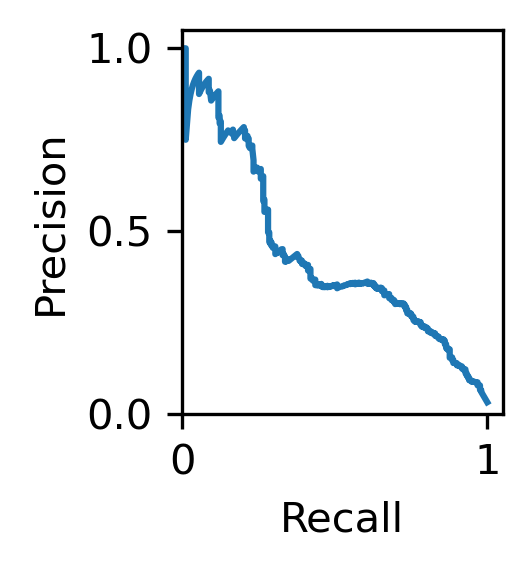

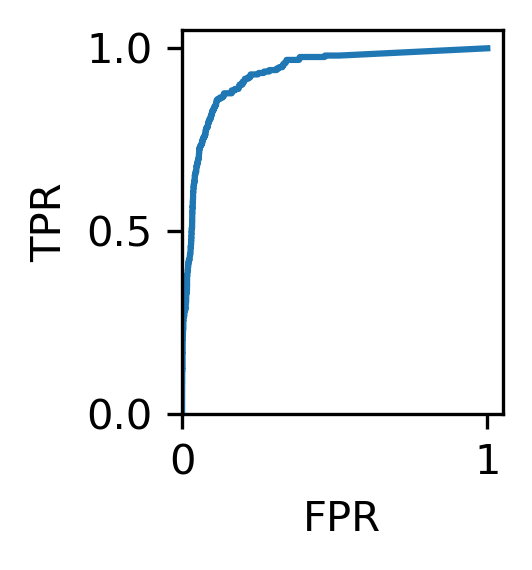

top 100 predicted stats
recall: 
1.0
precision: 
0.65
auroc: 0.7147252747252747
precision recall: 0.8149413711539484


In [16]:
test_vs_true(data_path, "TEST_03_19_2022.csv", model_path, model_results)

### SVMs on fingerprints

In [ ]:
# test just train set model on test set - could also do command line but it was convenient to keep in notebook
data_path = "../../ngonorrhoeae_abx_ml_discovery/data/data_prep_for_ml/data_prep_for_ml_pk_37k_screen/"
model_path = (
    "../../ngonorrhoeae_abx_ml_discovery/models/other_models/svm_hyperopt_pk_37k/"
)
actual_model_path = model_path + "15/"
model_results = "15_test_set_svm_preds.csv"
activate_command = "conda activate chemprop; "
run_command = (
    "python sklearn_predict.py --test_path "
    + data_path
    + "TEST_03_19_2022.csv --checkpoint_dir "
    + actual_model_path
    + " --preds_path "
    + model_path
    + model_results
    + " --smiles_column SMILES"
)
full_command = activate_command + run_command
test = subprocess.run(
    full_command, cwd="../../chemprop/", shell=True, capture_output=True
)

all stats
auroc: 0.8610026103994741
precision recall: 0.49767682936353247


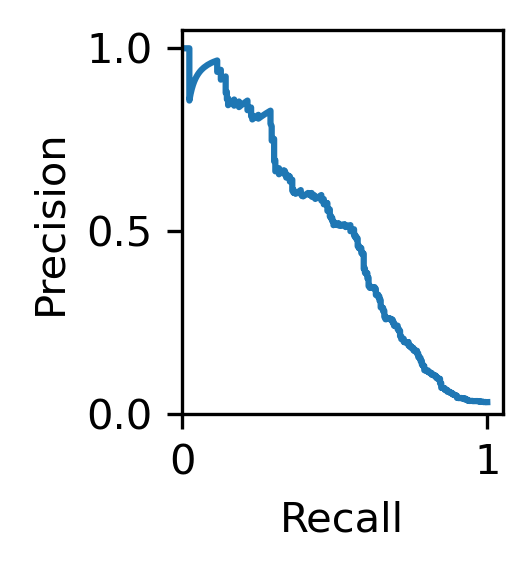

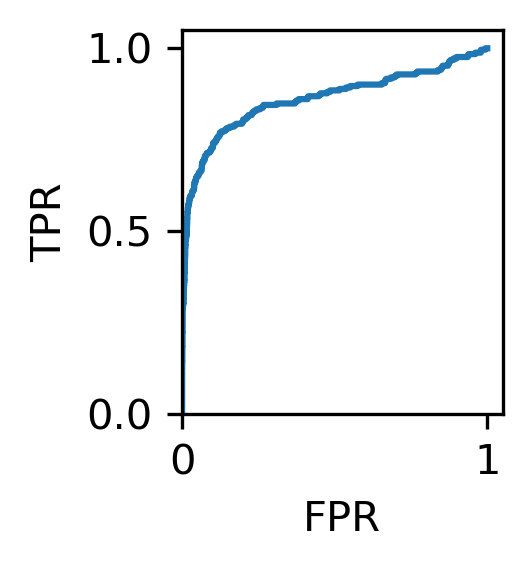

top 100 predicted stats
recall: 
0.4666666666666667
precision: 
0.9210526315789473
auroc: 0.7373333333333334
precision recall: 0.8864241742241417


In [18]:
test_vs_true(data_path, "TEST_03_19_2022.csv", model_path, model_results)

### FFN on fingerprints

In [ ]:
# test just train set model on test set - could also do command line but it was convenient to keep in notebook
data_path = "../../ngonorrhoeae_abx_ml_discovery/data/data_prep_for_ml/data_prep_for_ml_pk_37k_screen/"
model_path = (
    "../../ngonorrhoeae_abx_ml_discovery/models/other_models/ffn_hyperopt_pk_37k/"
)
actual_model_path = model_path + "20/"
model_results = "20_test_set_ffn_preds.csv"
activate_command = "conda activate chemprop; "
run_command = (
    "python sklearn_predict.py --test_path "
    + data_path
    + "TEST_03_19_2022.csv --checkpoint_dir "
    + actual_model_path
    + " --preds_path "
    + model_path
    + model_results
    + " --smiles_column SMILES  --features_generator morgan --no_features_scaling"
)
full_command = activate_command + run_command
test = subprocess.run(
    full_command, cwd="../../chemprop/", shell=True, capture_output=True
)

all stats
auroc: 0.8993020319417584
precision recall: 0.48793736729294873


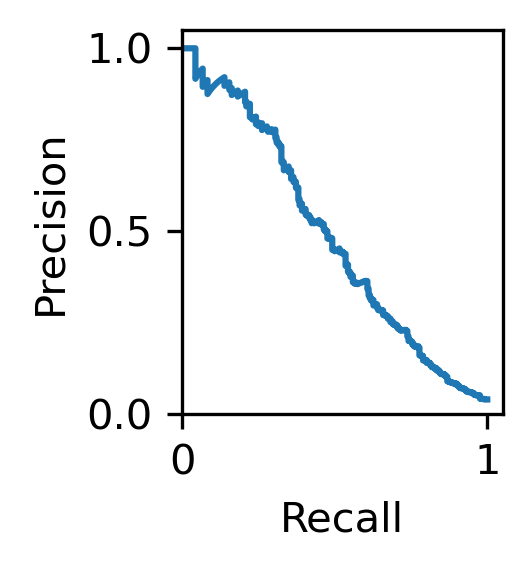

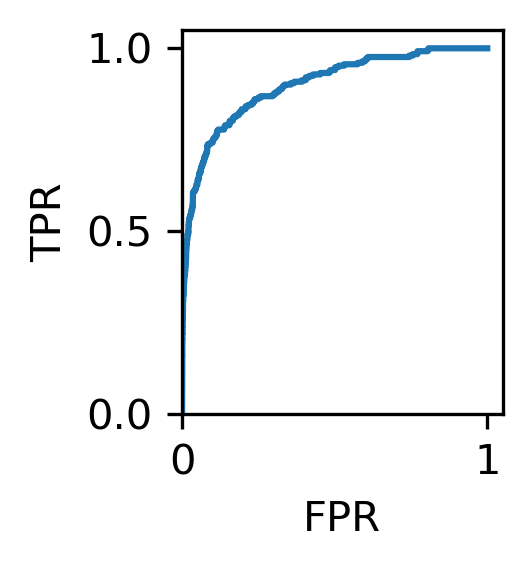

top 100 predicted stats
recall: 
1.0
precision: 
0.77
auroc: 0.6784302653867871
precision recall: 0.8807854270840441


In [20]:
test_vs_true(data_path, "TEST_03_19_2022.csv", model_path, model_results)

### GNN on PK screen alone

In [ ]:
# test just train set model on test set - could also do command line but it was convenient to keep in notebook
data_path = "../../ngonorrhoeae_abx_ml_discovery/data/data_prep_for_ml/data_prep_for_ml_pk_screen/"
model_path = "../../ngonorrhoeae_abx_ml_discovery/models/pk_screen_models_11152021/"
actual_model_path = model_path + "151/"
model_results = "151_test_set_gnn_preds.csv"
run_command = (
    "python predict.py --test_path "
    + data_path
    + "TEST_11_15_2021.csv --checkpoint_dir "
    + actual_model_path
    + " --preds_path "
    + model_path
    + model_results
    + " --features_path "
    + data_path
    + "TEST_11_15_2021.npz --no_features_scaling --smiles_column SMILES --ensemble_variance"
)
full_command = activate_command + run_command
test = subprocess.run(full_command, cwd="../chemprop/", shell=True, capture_output=True)

In [23]:
# instead of test_vs_true, performed slightly differently-coded model evaluation; results are in 151_test_set_performance.csv

### GNN on PK+37K screen

In [ ]:
# test just train set model on test set - could also do command line but it was convenient to keep in notebook
data_path = "../../ngonorrhoeae_abx_ml_discovery/data/data_prep_for_ml/data_prep_for_ml_pk_37k_screen/"
model_path = "../../ngonorrhoeae_abx_ml_discovery/models/pk_37k_screen_models_03192022/"
model_name = "depth_3_dropout_0.15000000000000002_ffn_num_layers_3_hidden_size_2300"
actual_model_path = model_path + model_name
model_results = model_name + "_preds.csv"
activate_command = "conda activate chemprop; "
run_command = (
    "python predict.py --test_path "
    + data_path
    + "TEST_03_19_2022.csv --checkpoint_dir "
    + actual_model_path
    + " --preds_path "
    + model_path
    + model_results
    + " --features_path "
    + data_path
    + "TEST_03_19_2022.npz --no_features_scaling --smiles_column SMILES --ensemble_variance --gpu 0"
)
full_command = activate_command + run_command
test = subprocess.run(full_command, cwd="../chemprop/", shell=True, capture_output=True)

all stats
auroc: 0.9260503826245683
precision recall: 0.5361002617930711


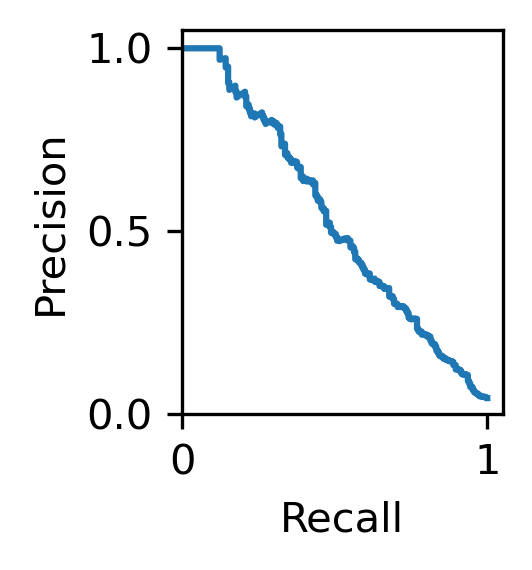

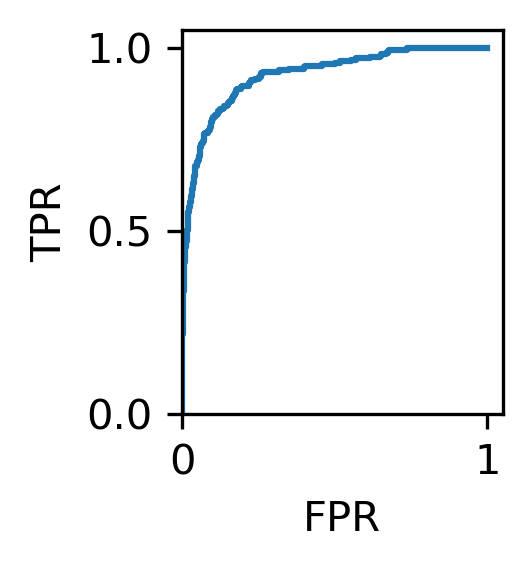

top 100 predicted stats
recall: 
0.9873417721518988
precision: 
0.7878787878787878
auroc: 0.6962025316455696
precision recall: 0.9124859529162718


In [25]:
test_vs_true(data_path, "TEST_03_19_2022.csv", model_path, model_results)

### GNN on PK+37K screen + 1st round validation

In [ ]:
# test just train set model on test set - could also do command line but it was convenient to keep in notebook
data_path = "../../ngonorrhoeae_abx_ml_discovery/data/data_prep_for_ml/data_prep_for_ml_pk_37k_first_round_val_screen/"
model_path = "../../ngonorrhoeae_abx_ml_discovery/models/pk_37k_first_round_val_screen_models_10262022/"
model_name = "depth_5_dropout_0.25_ffn_num_layers_2_hidden_size_800"
actual_model_path = model_path + model_name
model_results = model_name + "_preds.csv"
activate_command = "conda activate chemprop; "
run_command = (
    "python predict.py --test_path "
    + data_path
    + "TEST_10_26_2022.csv --checkpoint_dir "
    + actual_model_path
    + " --preds_path "
    + model_path
    + model_results
    + " --features_path "
    + data_path
    + "TEST_10_26_2022.npz --no_features_scaling --smiles_column SMILES --ensemble_variance --gpu 0"
)
full_command = activate_command + run_command
test = subprocess.run(full_command, cwd="../chemprop/", shell=True, capture_output=True)

all stats
auroc: 0.9362795570458112
precision recall: 0.6150414351487526


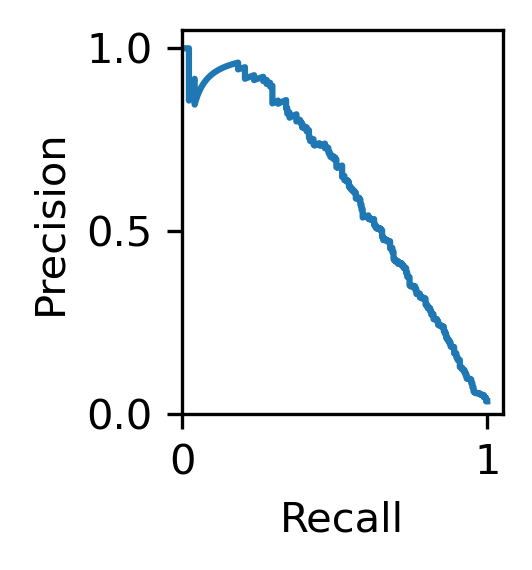

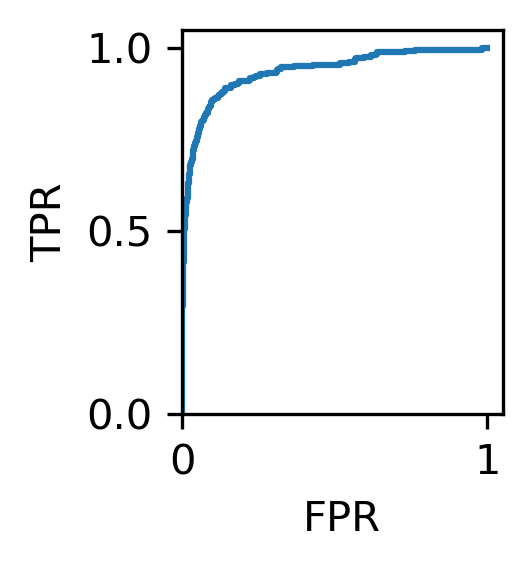

top 100 predicted stats
recall: 
1.0
precision: 
0.85
auroc: 0.7372549019607844
precision recall: 0.9231888670753678


In [29]:
test_vs_true(data_path, "TEST_10_26_2022.csv", model_path, model_results)

### GNN on PK+37K screen + 3 rounds validation

In [ ]:
# test just train set model on test set - could also do command line but it was convenient to keep in notebook
data_path = "../../ngonorrhoeae_abx_ml_discovery/data/data_prep_for_ml/data_prep_for_ml_pk_37k_three_rounds_val/"
model_path = "../../ngonorrhoeae_abx_ml_discovery/models/pk_37k_three_rounds_val_models_03312023/"
model_name = "trial_seed_17"
actual_model_path = model_path + model_name
model_results = model_name + "_preds.csv"
activate_command = "conda activate chemprop; "
run_command = (
    "python predict.py --test_path "
    + data_path
    + "TEST_03_31_2023.csv --checkpoint_dir "
    + actual_model_path
    + " --preds_path "
    + model_path
    + model_results
    + " --features_path "
    + data_path
    + "TEST_03_31_2023.npz --no_features_scaling --smiles_column SMILES --ensemble_variance --gpu 0"
)
full_command = activate_command + run_command
test = subprocess.run(full_command, cwd="../chemprop/", shell=True, capture_output=True)

all stats
auroc: 0.9231029958613145
precision recall: 0.5276820216126904


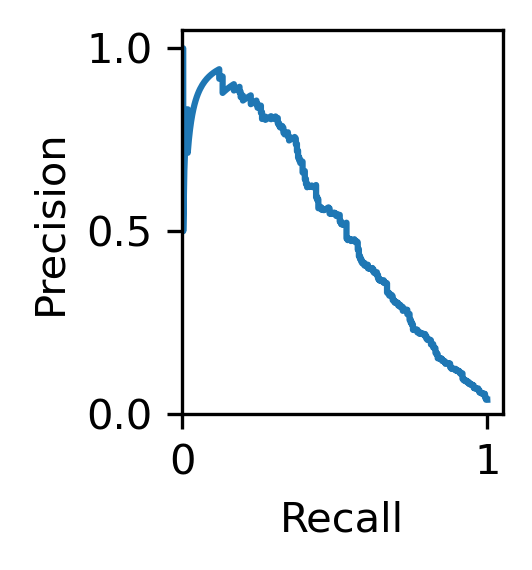

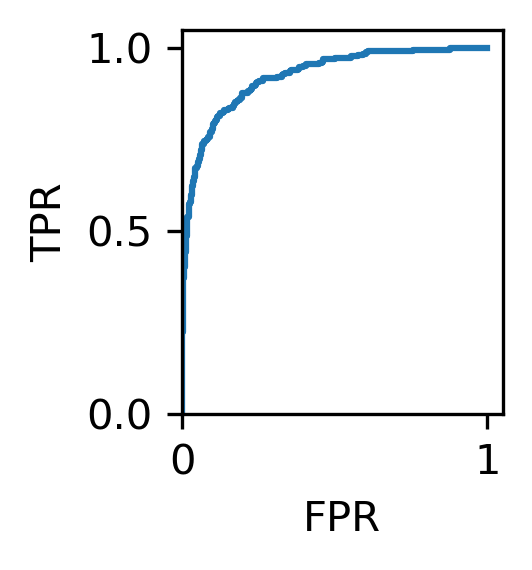

top 100 predicted stats
recall: 
1.0
precision: 
0.81
auroc: 0.6523716699155295
precision recall: 0.8641566788896411


In [31]:
test_vs_true(data_path, "TEST_03_31_2023.csv", model_path, model_results)

After figuring out final hyperparameters, can train models with all data in the 04_train_final_models_all_data.sh script.

In [ ]:
all_pk_37k_gnn_models = pd.read_csv(
    "../models/pk_37k_screen_models_03192022/best_bayesian_models_04052022.csv"
)
all_pk_37k_gnn_models

,Name,auPR,auROC
0,depth_3_dropout_0.15000000000000002_ffn_num_la...,0.496595,0.904771
1,depth_5_dropout_0.25_ffn_num_layers_2_hidden_s...,0.493244,0.907362
2,depth_4_dropout_0.2_ffn_num_layers_3_hidden_si...,0.485611,0.904800
3,depth_6_dropout_0.30000000000000004_ffn_num_la...,0.483157,0.902562
4,depth_4_dropout_0.35000000000000003_ffn_num_la...,0.479004,0.900638
5,depth_4_dropout_0.30000000000000004_ffn_num_la...,0.474521,0.895864
6,depth_2_dropout_0.30000000000000004_ffn_num_la...,0.469082,0.899644
7,depth_3_dropout_0.4_ffn_num_layers_2_hidden_si...,0.465979,0.903821
8,depth_3_dropout_0.15000000000000002_ffn_num_la...,0.445869,0.893179
9,depth_3_dropout_0.30000000000000004_ffn_num_la...,0.435117,0.895844


In [3]:
print(sp.pearsonr(all_pk_37k_gnn_models["auPR"], all_pk_37k_gnn_models["auROC"]))

(0.8029879337835795, 0.005157079731233701)
